# Model 4- Random Forest Regression

## Performance enhancing method 1: GridSearchCV(hyperparameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def run_RandomForest(my_data, features, indyvar):
    print("yvar is " + str(indyvar))
    data_merge = my_data.dropna()

    sel_recon = features
    x = data_merge.loc[:, sel_recon]
    y = np.ravel(data_merge.loc[:, indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Initialize Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=10)
    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    # Best Parameters from Grid Search
    best_params = grid_search.best_params_
    print("Best Hyperparameters: ", best_params)
    # No need to scale data for Random Forest

    # Create a Random Forest Regressor
    reg = RandomForestRegressor(**best_params, random_state=10)

    # Training data
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = reg.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    # Feature importance
    feature_importance = reg.feature_importances_
    print('Feature Importance:', feature_importance)

    # We can't directly calculate R-squared for Random Forest Regressor
    # Instead, we can calculate R-squared-like metrics
    from sklearn.metrics import explained_variance_score, r2_score
    evs_train = explained_variance_score(y_train, pred_train)
    r2_train = r2_score(y_train, pred_train)
    print('Explained Variance Score (Training):', round(evs_train, 2))
    print('R-squared (Training):', round(r2_train, 2))

    evs_test = explained_variance_score(y_test, pred)
    r2_test = r2_score(y_test, pred)
    print('Explained Variance Score (Test):', round(evs_test, 2))
    print('R-squared (Test):', round(r2_test, 2))

    # We can't directly calculate mean squared error for Random Forest Regressor
    # Instead, it's already calculated above

    # Random Forest doesn't provide coefficients like linear models, but we have feature importance
    # Random Forest doesn't use alpha values like Lasso, so no need for alpha search
    # Random Forest doesn't have a concept of alphas and paths like LassoCV

    # Plotting feature importances
    plt.barh(list_numerical, feature_importance)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance in Random Forest')
    plt.show()


In [ ]:
def run_RandomForest_and_predict(my_data, features, indyvar):
    print("yvar is " + str(indyvar))
    data_merge_RF = my_data.dropna()

    sel_recon_RF = features
    x = data_merge_RF.loc[:, sel_recon_RF]
    y = np.ravel(data_merge_RF.loc[:, indyvar])

    list_numerical = x.columns
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

    scaler = StandardScaler().fit(X_train[list_numerical])

    X_train[list_numerical] = scaler.transform(X_train[list_numerical])
    X_test[list_numerical] = scaler.transform(X_test[list_numerical])

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Initialize Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=10)
    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    # Best Parameters from Grid Search
    best_params = grid_search.best_params_
    print("Best Hyperparameters: ", best_params)

    # Initialize and train the Random Forest regression model

    rf_reg = RandomForestRegressor(**best_params, random_state=10)
    rf_reg.fit(X_train, y_train)

    # Training data
    pred_train = rf_reg.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    print('MSE training set', round(mse_train, 2))

    # Test data
    pred = rf_reg.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    print('MSE test set', round(mse_test, 2))

    # Predict using the Random Forest model
    y_pred = rf_reg.predict(x)
    return y_pred


### Predict grading features from shapemetrics data - Random Forest

In [ ]:
grading_ind = ['roundness', 'tailedness', 'blockiness', 'curviness']
shapemetrics_ind = ['firstorder_count', 'tail_count','residerror_count', 'roothairs_count', 'sphereerrors_count', 'largeresiderror_count', 'area_px','length_px', 'width_px', 'weight_oz', 'length_in','width_in']
usno1 = ['deviation_from_usno1']

In [ ]:
# SELECT USER ROLE IF YOU WANT TO SPLIT IT
data_z = data_z.loc[data_z['user_role'] == "Breeder"]

yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MSE training set 130.64
MSE test set 286.79
Feature Importance: [0.12666196 0.36236454 0.07966707 0.43130643]
Explained Variance Score (Training): 0.8
R-squared (Training): 0.8
Explained Variance Score (Test): 0.6
R-squared (Test): 0.6


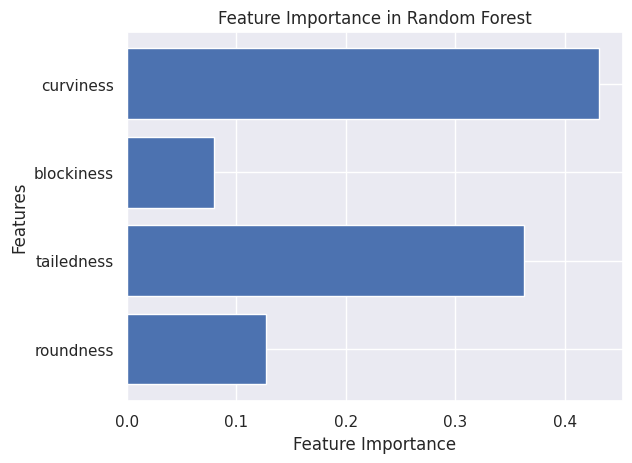

yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
MSE training set 173.74
MSE test set 535.82
Feature Importance: [0.08694843 0.31558349 0.10209484 0.09876582 0.05482671 0.05875209
 0.03320376 0.05489722 0.05899508 0.02871964 0.05570874 0.05150418]
Explained Variance Score (Training): 0.73
R-squared (Training): 0.73
Explained Variance Score (Test): 0.25
R-squared (Test): 0.25


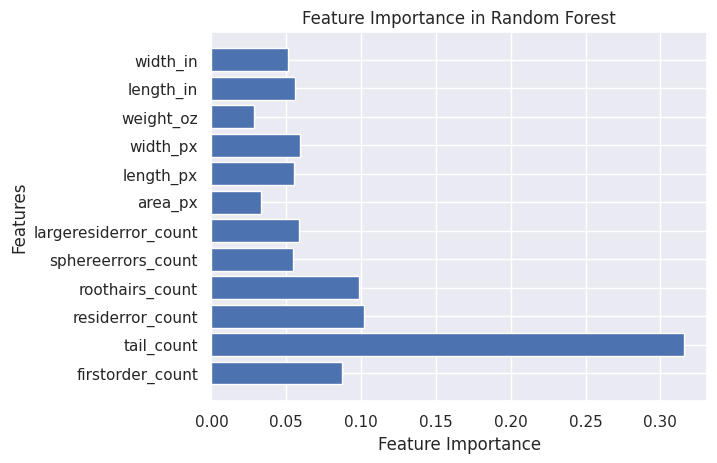

yvar is ['roundness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
MSE training set 142.0
MSE test set 367.36
Feature Importance: [0.14582031 0.02736427 0.02817321 0.03225124 0.02355723 0.02122673
 0.01376209 0.23717761 0.12512276 0.01192297 0.2164305  0.11719108]
Explained Variance Score (Training): 0.84
R-squared (Training): 0.84
Explained Variance Score (Test): 0.57
R-squared (Test): 0.57


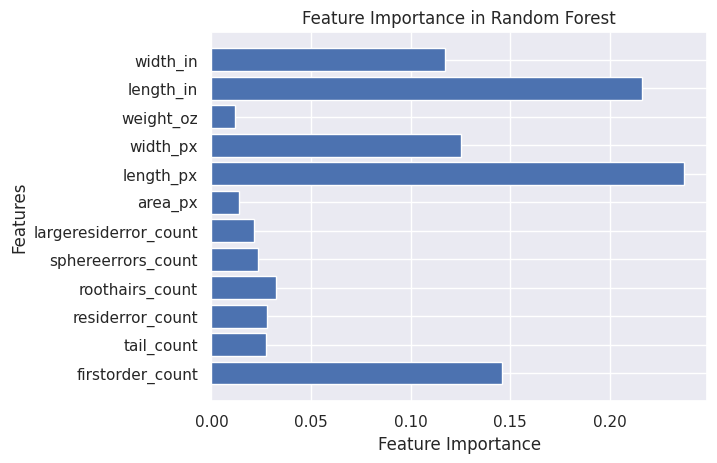

yvar is ['tailedness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
MSE training set 260.33
MSE test set 620.9
Feature Importance: [0.40373611 0.10101938 0.06539225 0.08469783 0.05884877 0.05251936
 0.02604825 0.04223498 0.04718496 0.02830233 0.04280786 0.0472079 ]
Explained Variance Score (Training): 0.76
R-squared (Training): 0.76
Explained Variance Score (Test): 0.38
R-squared (Test): 0.38


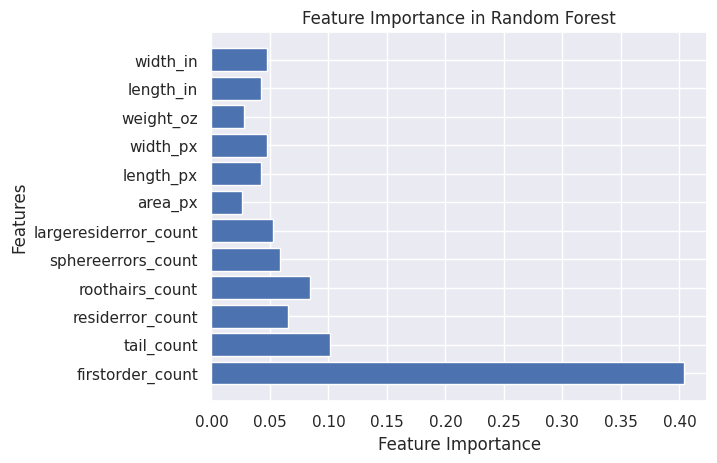

yvar is ['blockiness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MSE training set 235.97
MSE test set 509.8
Feature Importance: [0.35786928 0.1117064  0.0779515  0.08150716 0.0653082  0.05409306
 0.03249779 0.04340999 0.04399954 0.03673398 0.04748233 0.04744075]
Explained Variance Score (Training): 0.63
R-squared (Training): 0.63
Explained Variance Score (Test): 0.16
R-squared (Test): 0.16


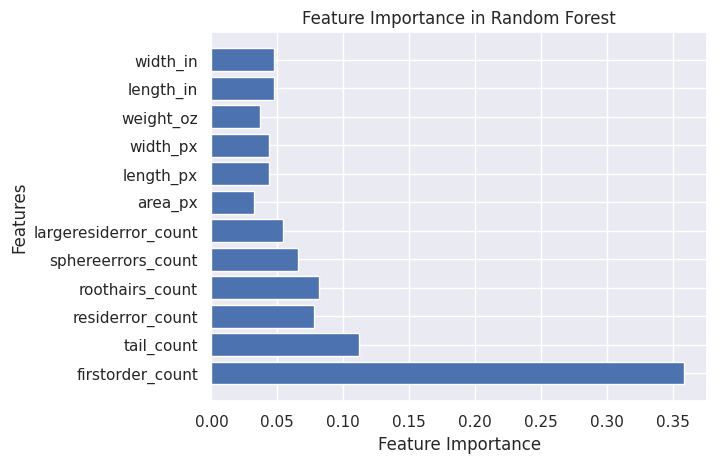

yvar is ['curviness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
MSE training set 97.66
MSE test set 511.14
Feature Importance: [0.10549729 0.2584181  0.12608966 0.07476008 0.08858788 0.07075986
 0.03005412 0.05023754 0.05018631 0.03626881 0.05950177 0.04963859]
Explained Variance Score (Training): 0.81
R-squared (Training): 0.81
Explained Variance Score (Test): 0.22
R-squared (Test): 0.21


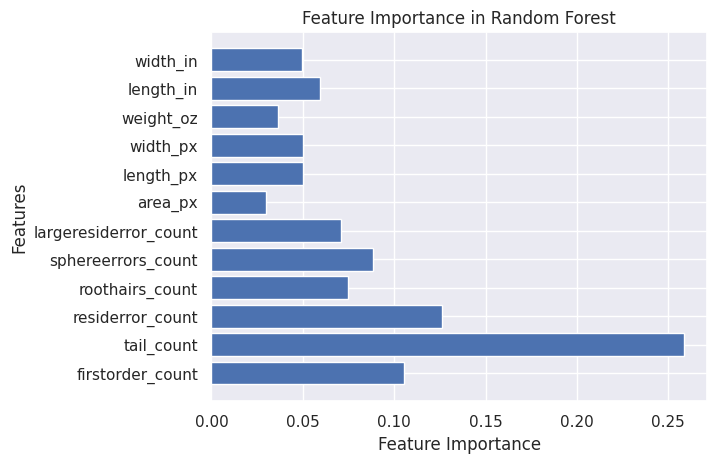

In [ ]:
# devUS#1 from grading
run_RandomForest(my_data = data_z, features=grading_ind, indyvar= ['deviation_from_usno1'])

# devUS#1 from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['deviation_from_usno1'])

# roundness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['roundness'])

# tailedness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['tailedness'])

# blockiness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['blockiness'])

# curviness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['curviness'])

### Predict from prediction (see description)
We use RF to predict each grading feature (roundness, curviness, tailedness, blockiness) from the reconstruction data. Then, we use those predictions to predict deviation from USNo1

In [ ]:
data_merge_z3 = data_z
data_pred2 = data_merge_z3.dropna()

data_pred2['roundness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
data_pred2['curviness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])
data_pred2['tailedness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])
data_pred2['blockiness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])

yvar is ['roundness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
MSE training set 142.0
MSE test set 367.35
yvar is ['curviness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits


<ipython-input-39-a4e74223f6cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['roundness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
MSE training set 97.49
MSE test set 510.24
yvar is ['tailedness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits


<ipython-input-39-a4e74223f6cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['curviness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
MSE training set 260.38
MSE test set 620.84
yvar is ['blockiness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits


<ipython-input-39-a4e74223f6cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['tailedness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MSE training set 235.98
MSE test set 509.93


<ipython-input-39-a4e74223f6cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['blockiness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
MSE training set 632.5
MSE test set 709.19
Feature Importance: [0.34409492 0.23717157 0.         0.41873351]
Explained Variance Score (Training): 0.02
R-squared (Training): 0.02
Explained Variance Score (Test): 0.02
R-squared (Test): 0.0


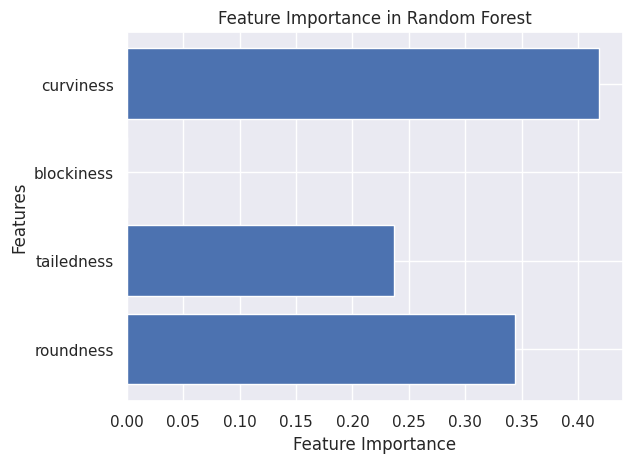

In [ ]:
run_RandomForest(my_data = data_pred2, features=grading_ind, indyvar= ['deviation_from_usno1'])


## Performance enhancing method 2: Cross Validation+GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def run_RandomForest(my_data, features, indyvar):
    print("yvar is " + str(indyvar))
    data_merge = my_data.dropna()

    sel_recon = features
    x = data_merge.loc[:, sel_recon]
    y = np.ravel(data_merge.loc[:, indyvar])

    list_numerical = x.columns

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=10)

    # Grid Search for Hyperparameter Tuning using Cross-Validation
    grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(x, y)

    # Best Parameters from Grid Search
    best_params = grid_search.best_params_
    print("Best Hyperparameters: ", best_params)

    # Initialize Random Forest Regressor with best parameters
    reg = RandomForestRegressor(**best_params, random_state=10)

    # Cross-Validation to evaluate the model
    cv_scores = cross_val_score(reg, x, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -cv_scores.mean()
    print('Average MSE (Cross-Validation):', round(avg_mse, 2))

    # Feature importance
    reg.fit(x, y)
    feature_importance = reg.feature_importances_
    print('Feature Importance:', feature_importance)

    # Plotting feature importances
    plt.barh(list_numerical, feature_importance)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance in Random Forest')
    plt.show()


In [ ]:
def run_RandomForest_and_predict(my_data, features, indyvar):
    print("yvar is " + str(indyvar))
    data_merge_RF = my_data.dropna()

    sel_recon_RF = features
    x = data_merge_RF.loc[:, sel_recon_RF]
    y = np.ravel(data_merge_RF.loc[:, indyvar])

    list_numerical = x.columns

    scaler = StandardScaler().fit(x[list_numerical])
    x[list_numerical] = scaler.transform(x[list_numerical])

    # Parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=10)

    # Grid Search for Hyperparameter Tuning using Cross-Validation
    grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(x, y)

    # Best Parameters from Grid Search
    best_params = grid_search.best_params_
    print("Best Hyperparameters: ", best_params)

    # Initialize Random Forest Regressor with best parameters
    rf_reg = RandomForestRegressor(**best_params, random_state=10)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(rf_reg, x, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate the average MSE across all folds
    avg_mse = -cv_scores.mean()
    print('Average MSE (Cross-Validation):', round(avg_mse, 2))

    # Train the model on the entire dataset
    rf_reg.fit(x, y)

    # Predict using the Random Forest model
    y_pred = rf_reg.predict(x)
    return y_pred


### Predict grading features from shapemetrics data - Random Forest

In [ ]:
grading_ind = ['roundness', 'tailedness', 'blockiness', 'curviness']
shapemetrics_ind = ['firstorder_count', 'tail_count','residerror_count', 'roothairs_count', 'sphereerrors_count', 'largeresiderror_count', 'area_px','length_px', 'width_px', 'weight_oz', 'length_in','width_in']
usno1 = ['deviation_from_usno1']

In [ ]:
# SELECT USER ROLE IF YOU WANT TO SPLIT IT
data_z = data_z.loc[data_z['user_role'] == "Breeder"]

yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Average MSE (Cross-Validation): 265.51
Feature Importance: [0.13061554 0.35622915 0.07003118 0.44312413]


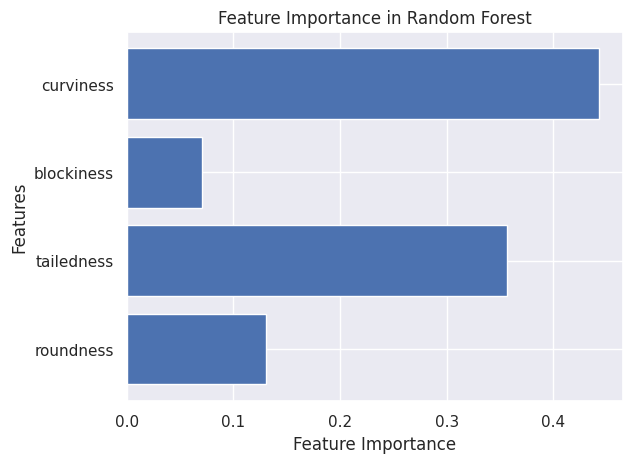

yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Average MSE (Cross-Validation): 514.18
Feature Importance: [0.18093896 0.25805276 0.08222967 0.08803399 0.04781352 0.05448498
 0.0254036  0.05170117 0.06451246 0.02757621 0.05918004 0.06007264]


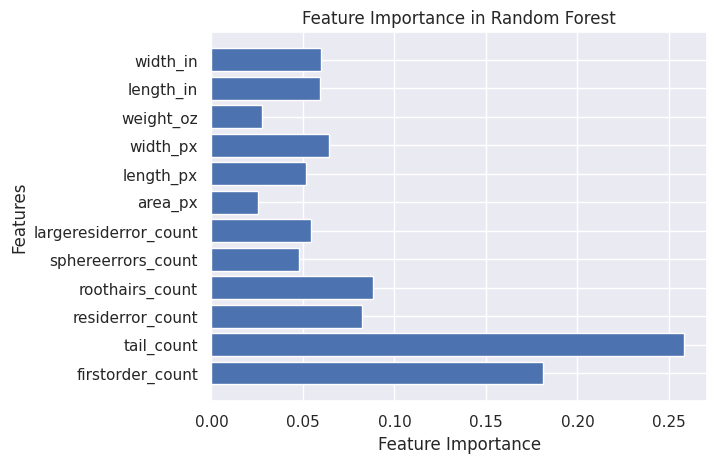

yvar is ['roundness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 362.88
Feature Importance: [0.13269934 0.03044077 0.03052066 0.03049112 0.02521144 0.02584289
 0.01684575 0.23437858 0.12472898 0.01555674 0.20631178 0.12697195]


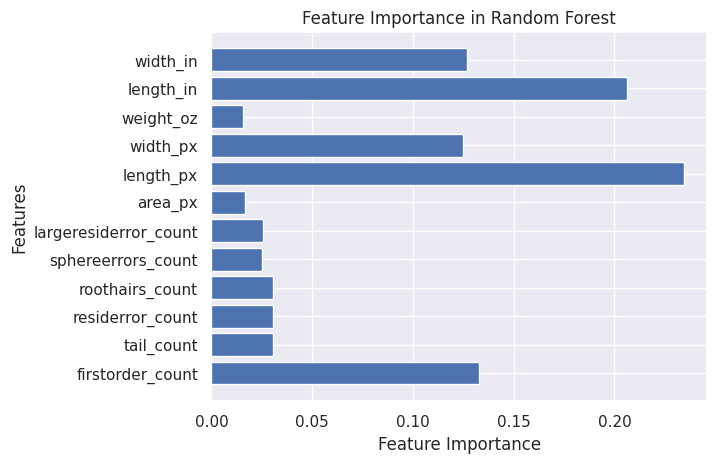

yvar is ['tailedness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 738.38
Feature Importance: [0.39087309 0.10081863 0.067128   0.10390222 0.05982043 0.04448574
 0.02650966 0.03732773 0.05012052 0.02857952 0.0419593  0.04847515]


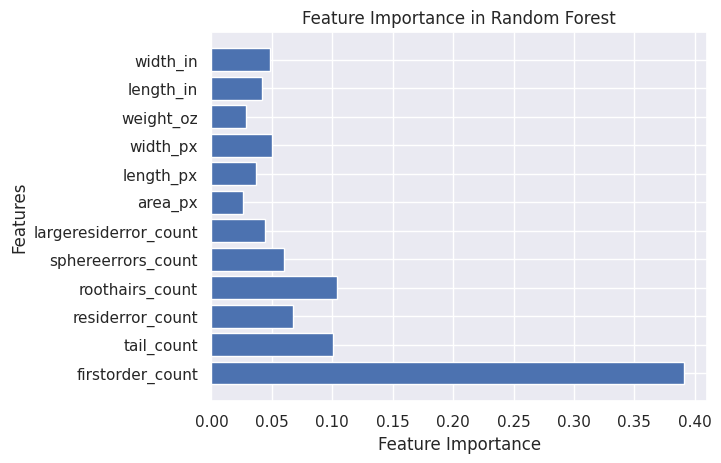

yvar is ['blockiness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 539.16
Feature Importance: [0.36367331 0.10573154 0.07197211 0.0829907  0.0702837  0.0672161
 0.03181888 0.04288068 0.04598462 0.02929905 0.04100935 0.04713997]


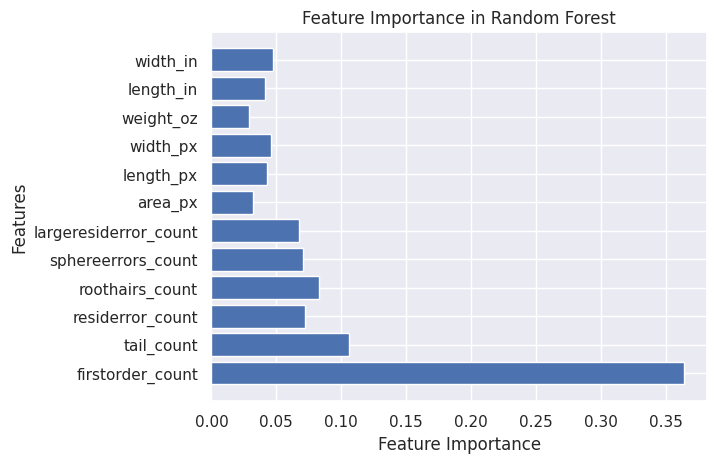

yvar is ['curviness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 506.62
Feature Importance: [0.15733029 0.29838013 0.09591989 0.08784911 0.06575331 0.06384542
 0.03045454 0.03947271 0.04662756 0.03164873 0.0361128  0.0466055 ]


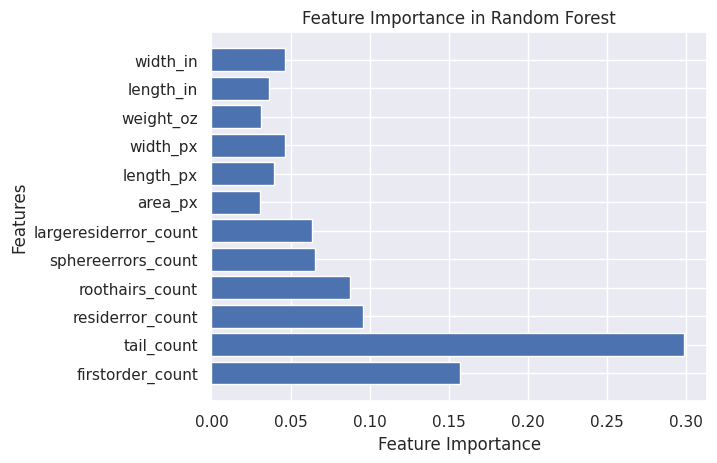

In [ ]:
# devUS#1 from grading
run_RandomForest(my_data = data_z, features=grading_ind, indyvar= ['deviation_from_usno1'])

# devUS#1 from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['deviation_from_usno1'])

# roundness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['roundness'])

# tailedness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['tailedness'])

# blockiness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['blockiness'])

# curviness from shapemetrics
run_RandomForest(my_data = data_z, features=shapemetrics_ind, indyvar= ['curviness'])

### Predict from prediction (see description)
We use RF to predict each grading feature (roundness, curviness, tailedness, blockiness) from the shapemetrics data. Then, we use those predictions to predict deviation from USNo1

In [ ]:
data_merge_z3 = data_z
data_pred2 = data_merge_z3.dropna()

data_pred2['roundness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])
data_pred2['curviness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])
data_pred2['tailedness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])
data_pred2['blockiness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])

yvar is ['roundness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 362.88


<ipython-input-47-a4e74223f6cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['roundness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['roundness'])


yvar is ['curviness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 506.85


<ipython-input-47-a4e74223f6cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['curviness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['curviness'])


yvar is ['tailedness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 738.44


<ipython-input-47-a4e74223f6cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['tailedness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['tailedness'])


yvar is ['blockiness']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 538.96


<ipython-input-47-a4e74223f6cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred2['blockiness'] = run_RandomForest_and_predict(my_data = data_merge_z3, features=shapemetrics_ind, indyvar= ['blockiness'])


yvar is ['deviation_from_usno1']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Average MSE (Cross-Validation): 305.73
Feature Importance: [0.16372252 0.2179144  0.0604479  0.55791517]


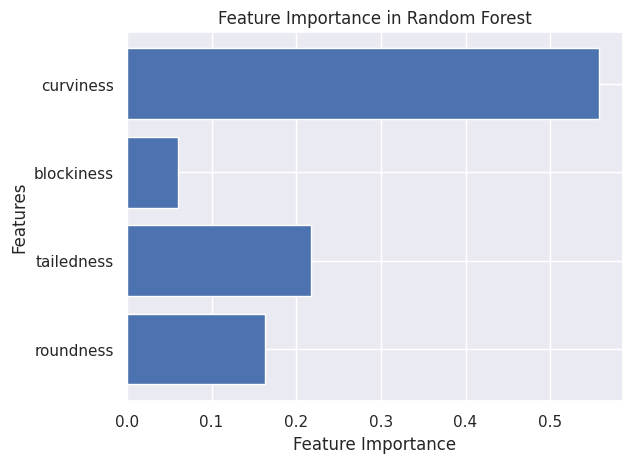

In [ ]:
run_RandomForest(my_data = data_pred2, features=grading_ind, indyvar= ['deviation_from_usno1'])